The stored spring potential energy is:
$$
V(x) = x^{2} - \alpha x^{3} + 0.1 x^{4} 
$$

now differentiate this with respect to x:

$$
f = -\dfrac{dV(x)}{dx} = - 2x + 3\alpha x^{2} - 0.4x^{3}
$$

At the first node, the only force acting on the particle is the string at 1-2. This means the only force acting between then is:
$$
f_1 = -\dfrac{dV(x_1-x_2-l)}{dx} 
$$

For the other nodes:

$$
f_i = -\dfrac{dV(x_i-x_{i+1}-l)}{dx} -\dfrac{dV(x_{i-1}-x_{i}-l)}{dx}
$$

and use again Newton's law, $f = m\ddot{x}$ gives.

The total energy for the whole system is therefore: 
$$
U = \sum_{i=1}^{N-1}V(x_i - x_{i+1} - l)
$$

And now let's see this in ACTION!!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Declare a mesh
L = 1
N = 1000
l = L/(N-1)
x = np.linspace(0, L, N)
# plt.figure(figsize=(12,10))
# plt.plot(x, np.ones(N),'-o')

In [2]:
def cal_force(temp):
    return -(2.*temp - 3.*alpha*(temp**2) + 0.4*(temp**3))

In [3]:
def cal_potential_energy(chain):
    results = 0.0
    n = chain.size
    for i in range(n-1):
        temp = chain[i] - chain[i+1] - l
        results += temp**2 - alpha*(temp**3) + 0.1*(i**4)
        
    return results

In [4]:
def cal_kinetic_energy(vel):
    results = 0.0
    for i in vel:
        results += 0.5*m*(i**2)
    return results

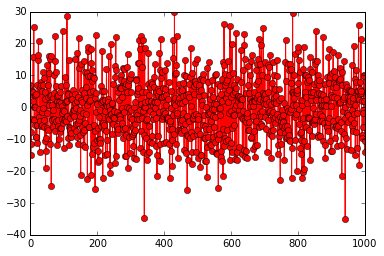

In [5]:
# Now we need to verlet every particle:
T = 10
dt = 0.01
num_iter = int(T/dt)
t = 0.0
m = 1.0
alpha = 0.5
gamma = 0.2
kB = 1.00
Temp = 2 # Kelvin

# Random initilise of v
# Make sure they have zero mean
v = 1000*np.random.normal(0, 0.01, N)
v = v - np.mean(v)
plt.plot(v,'-ro')

In [6]:
a = np.zeros(N)
net_length = []
potential_energy = []
kinetic_energy = []
v_mean = []
for it in range(num_iter):
    for i in range(N):
        if i==0:
            a[i] = (1.0/m)*cal_force(x[i] - x[i+1] - l)
        elif i==N-1:
            a[i] = (1.0/m)*cal_force(-(x[i-1] - x[i] - l))
        else:
            a[i] = (1.0/m)*(cal_force(x[i] - x[i+1] - l) - cal_force(x[i-1] - x[i] - l))

#     if it==0:
#         # Create a storage
#         x_store = x.copy()
#         # Euler at the very start
#         x = x + v*dt # + 0.5*a*dt*dt*2
#         v = v + a*dt
#     else:
    # Updated velvet scheme
    vhalf = v + a*dt*0.5
    xhalf = x + vhalf*dt*0.5
    vhathalf = np.exp(-gamma*dt) + np.sqrt(kB*Temp*(1-np.exp(-2*gamma*dt)))*np.random.normal(0, 1, v.size)
    x = x + vhathalf*dt*0.5
    v = vhathalf + a*dt*0.5

    # Create a storage
    net_length.append(np.abs(x[-1]-x[0])/L)
    potential_energy.append(cal_potential_energy(x))
    kinetic_energy.append(cal_kinetic_energy(v))
    #v_mean.append(np.mean(v))
#     increase time    
#     t += dt

1.01156242375


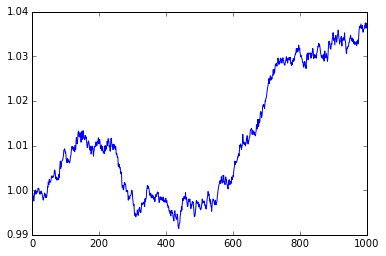

In [7]:
plt.plot(net_length)
print np.mean(net_length)

1.98504327337e+13


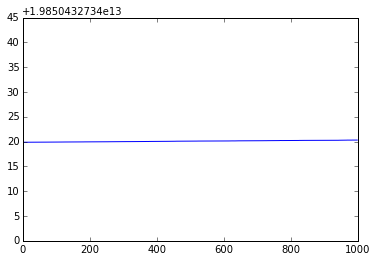

In [8]:
plt.plot(potential_energy)
print np.mean(potential_energy)

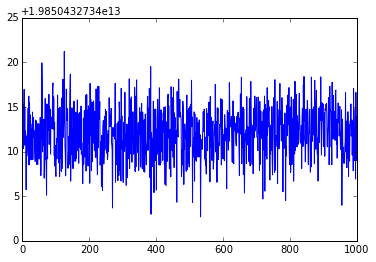

In [9]:
total_energy = [x + y for x, y in zip(potential_energy, kinetic_energy)]
plt.plot(total_energy)